In [65]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import s2sphere as s2
import seaborn as sns
import matplotlib.pyplot as plt
import gmplot
%matplotlib inline 

In [66]:
# http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml

# generate cell id
green = pd.read_csv('./green_tripdata_2015-01.csv')
green.index = range(len(green))
drop = ['Payment_type','lpep_pickup_datetime','Lpep_dropoff_datetime','Passenger_count',
        'Extra','MTA_tax','Tolls_amount','Trip_distance','Fare_amount','Ehail_fee','Total_amount','improvement_surcharge']
green.drop(drop,axis=1)
def calculateCellId(row):
    p = s2.LatLng.from_degrees(row['Store_and_fwd_flag'],row['RateCodeID'])
    return s2.CellId.from_lat_lng(p).to_token()

green['CellId'] = green.apply(calculateCellId,axis=1)

export_record = green[['Store_and_fwd_flag','RateCodeID','CellId']]
export_record.columns = ['longitude','latitude','cellid']
export_record.head()


,longitude,latitude,cellid
0,-73.922592,40.754528,b10209a4eff00211
1,-73.952751,40.677711,b0fdf62a1bae67bd
2,-73.843010,40.719055,b1020b8445e54f83
3,-73.860825,40.757793,b1020bee00453ff5
4,-73.945183,40.783321,b1020849176acc75


In [69]:
export_record.count()
export_record_drop0 = export_record[export_record.longitude != 0]
export_record_drop0.count()
export_record_drop0.to_csv('cellid.csv')

export_record_drop0.sample(20)

,longitude,latitude,cellid
1151893,-73.987610,40.691380,b0fdf7eac62889c3
569567,-73.941528,40.813225,b10208506b40162d
552721,-73.962669,40.804543,b1020815ae278f79
1176822,-73.945786,40.807953,b102084574640e1f
1319901,-73.844307,40.721359,b1020b85afed4ffb
851615,-73.949577,40.793461,b10208464a341345
807348,-73.896118,40.866943,b102093a6ba9c217
1330251,-73.947212,40.784363,b1020848589ee0b3
1295353,-73.944077,40.679329,b10209d9febdc6c7
118459,-73.936531,40.820530,b1020856c50a03b3


In [12]:
record_with_cellId = pd.read_csv('./cellid.csv')
record_with_cellId.count()

Unnamed: 0    1506026
longtitude    1506026
latitude      1506026
cellid        1506026
dtype: int64

In [17]:
x_lim=(record_with_cellId['longtitude'].min(),record_with_cellId['longtitude'].max())
y_lim=(record_with_cellId['latitude'].min(),record_with_cellId['latitude'].max())
print(x_lim, y_lim)

(-75.35131072998048, -70.91851043701172) (39.36097717285156, 42.91824722290039)


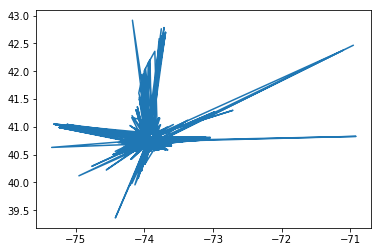

In [22]:
x=record_with_cellId['longtitude']
y=record_with_cellId['latitude']

plt.plot(x,y)
plt.show()